# Welcome to Golf Nattapat's project

This is not *my make money the series* project. But I'm interested in trying statistics to solve real-world problems. So I'm going to try to solve why the company's revenue is declining and how to improve it. This project refers to https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data

**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**Column Profiling:**

datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weather: 1: Clear, Few clouds, partly cloudy, partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered

# Data Analysis

## Ask
Follow from project referance.

**The company wants to know:**

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

How well those variables describe the electric cycle demands?

**Concepts Used:**

Bi-Variate Analysis 2-sample t-test: testing for difference across populations ANNOVA Chi-square

**How to begin:**

Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset

Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)

Select an appropriate test to check whether:

Working Day has effect on number of electric cycles rented

No. of cycles rented similar or different in different seasons

No. of cycles rented similar or different in different weather

Weather is dependent on season (check between 2 predictor variable)

Set up Null Hypothesis (H0) State the alternate hypothesis (H1) Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)

Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary

Set a significance level (alpha) Calculate test Statistics. Decision to accept or reject null hypothesis. Inference from the analysis

## Prepare

In [1]:
# Install package
install.packages("RSQLite")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘RSQLite’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [2]:
# Load library
library(plyr)
library(dplyr)
library(tidyverse)
library(tidyr)
library(ggplot2)
library(GGally)
library(lubridate)
library(sqldf)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ stringr 1.5.0
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.3     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::ren

In [3]:
yulu_data <- read.csv('/kaggle/input/yulu-bike-sharing-data/yulu_bike_sharing_dataset.csv')
yulu_data %>% head()
   

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
1,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
3,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
4,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
5,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
6,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


## Process

In [4]:
# Check NA data
sum(is.na(yulu_data))
nrow(yulu_data)

[1] 0

[1] 10886

In [5]:
# Check data type
glimpse(yulu_data)

Rows: 10,886
Columns: 12
$ datetime   <chr> "2011-01-01 00:00:00", "2011-01-01 01:00:00", "2011-01-01 0…
$ season     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ holiday    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ workingday <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ weather    <int> 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3,…
$ temp       <dbl> 9.84, 9.02, 9.02, 9.84, 9.84, 9.84, 9.02, 8.20, 9.84, 13.12…
$ atemp      <dbl> 14.395, 13.635, 13.635, 14.395, 14.395, 12.880, 13.635, 12.…
$ humidity   <int> 81, 80, 80, 75, 75, 75, 80, 86, 75, 76, 76, 81, 77, 72, 72,…
$ windspeed  <dbl> 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 6.0032, 0.0000, 0.0…
$ casual     <int> 3, 8, 5, 3, 0, 0, 2, 1, 1, 8, 12, 26, 29, 47, 35, 40, 41, 1…
$ registered <int> 13, 32, 27, 10, 1, 1, 0, 2, 7, 6, 24, 30, 55, 47, 71, 70, 5…
$ count      <int> 16, 40, 32, 13, 1, 1, 2, 3, 8, 14, 36, 56, 84, 94, 106, 110…


In [6]:
# Change to date time format
yulu_data$datetime <- as.POSIXct(yulu_data$datetime, format="%Y-%m-%d %H:%M:%S")
class(yulu_data$datetime)

[1] "POSIXct" "POSIXt"

In [7]:
# Separate Date and Time column and remove Datetime column
yulu_data$date <- as.Date(yulu_data$datetime)
yulu_data$time <- format(as.POSIXct(yulu_data$datetime),format = "%H:%M:%S")
yulu_new_df <- yulu_data[,-1]
glimpse(yulu_new_df)

Rows: 10,886
Columns: 13
$ season     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ holiday    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ workingday <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ weather    <int> 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3,…
$ temp       <dbl> 9.84, 9.02, 9.02, 9.84, 9.84, 9.84, 9.02, 8.20, 9.84, 13.12…
$ atemp      <dbl> 14.395, 13.635, 13.635, 14.395, 14.395, 12.880, 13.635, 12.…
$ humidity   <int> 81, 80, 80, 75, 75, 75, 80, 86, 75, 76, 76, 81, 77, 72, 72,…
$ windspeed  <dbl> 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 6.0032, 0.0000, 0.0…
$ casual     <int> 3, 8, 5, 3, 0, 0, 2, 1, 1, 8, 12, 26, 29, 47, 35, 40, 41, 1…
$ registered <int> 13, 32, 27, 10, 1, 1, 0, 2, 7, 6, 24, 30, 55, 47, 71, 70, 5…
$ count      <int> 16, 40, 32, 13, 1, 1, 2, 3, 8, 14, 36, 56, 84, 94, 106, 110…
$ date       <date> 2011-01-01, 2011-01-01, 2011-01-01, 2011-01-01, 2011-01-01…
$ time       <c

In [8]:
# Chang time to int
yulu_new_df$time <- revalue(yulu_new_df$time, c("00:00:00" = 0,
                                               "01:00:00" = 1,
                                               "02:00:00" = 2,
                                               "03:00:00" = 3,
                                               "04:00:00" = 4,
                                               "05:00:00" = 5,
                                               "06:00:00" = 6,
                                               "07:00:00" = 7,
                                               "08:00:00" = 8,
                                               "09:00:00" = 9,
                                               "10:00:00" = 10,
                                               "11:00:00" = 11,
                                               "12:00:00" = 12,
                                               "13:00:00" = 13,
                                               "14:00:00" = 14,
                                               "15:00:00" = 15,
                                               "16:00:00" = 16,
                                               "17:00:00" = 17,
                                               "18:00:00" = 18,
                                               "19:00:00" = 19,
                                               "20:00:00" = 20,
                                               "21:00:00" = 21,
                                               "22:00:00" = 22,
                                               "23:00:00" = 23))

yulu_new_df$time <- as.integer(yulu_new_df$time)
glimpse(yulu_new_df)

Rows: 10,886
Columns: 13
$ season     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ holiday    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ workingday <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ weather    <int> 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3,…
$ temp       <dbl> 9.84, 9.02, 9.02, 9.84, 9.84, 9.84, 9.02, 8.20, 9.84, 13.12…
$ atemp      <dbl> 14.395, 13.635, 13.635, 14.395, 14.395, 12.880, 13.635, 12.…
$ humidity   <int> 81, 80, 80, 75, 75, 75, 80, 86, 75, 76, 76, 81, 77, 72, 72,…
$ windspeed  <dbl> 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 6.0032, 0.0000, 0.0…
$ casual     <int> 3, 8, 5, 3, 0, 0, 2, 1, 1, 8, 12, 26, 29, 47, 35, 40, 41, 1…
$ registered <int> 13, 32, 27, 10, 1, 1, 0, 2, 7, 6, 24, 30, 55, 47, 71, 70, 5…
$ count      <int> 16, 40, 32, 13, 1, 1, 2, 3, 8, 14, 36, 56, 84, 94, 106, 110…
$ date       <date> 2011-01-01, 2011-01-01, 2011-01-01, 2011-01-01, 2011-01-01…
$ time       <i

## Analysis

**Which variables are significant in predicting the demand for shared electric cycles in the Indian market?**

**How well those variables describe the electric cycle demands?**

In [9]:
# Find correlation
correlations <- cor(yulu_new_df[,-9:-12], yulu_new_df$count)
round(correlations,2)

season,0.16
holiday,-0.01
workingday,0.01
weather,-0.13
temp,0.39
atemp,0.39
humidity,-0.32
windspeed,0.10
time,0.40


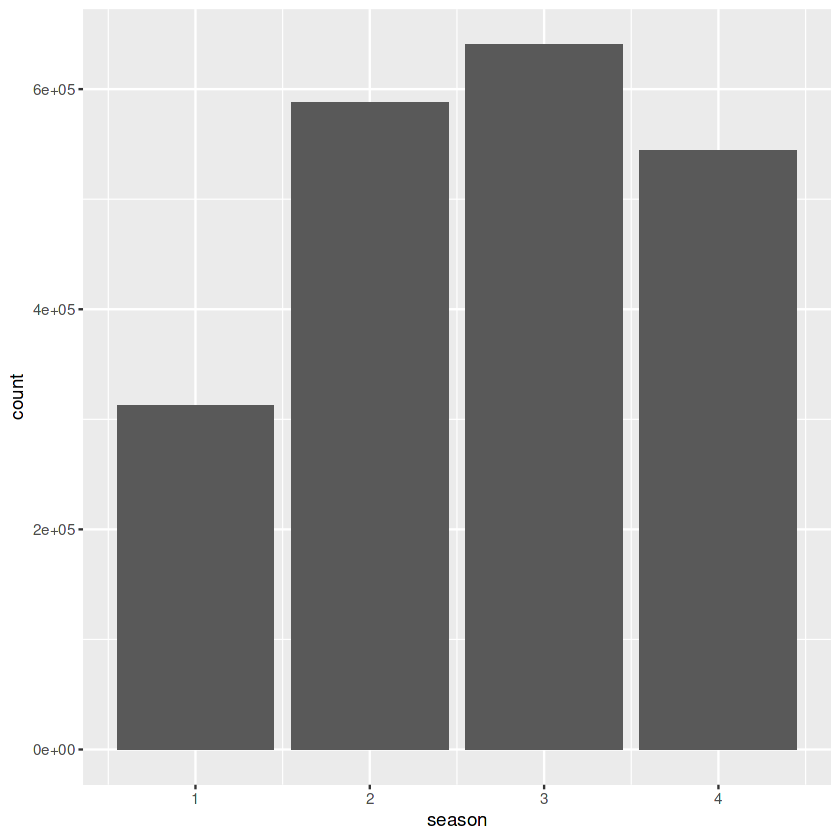

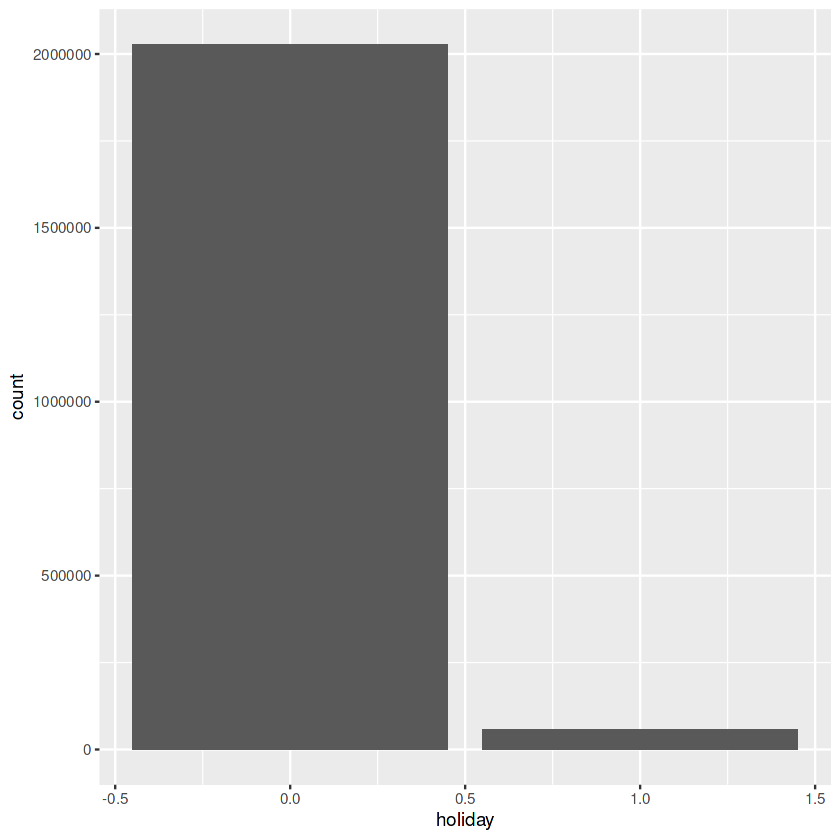

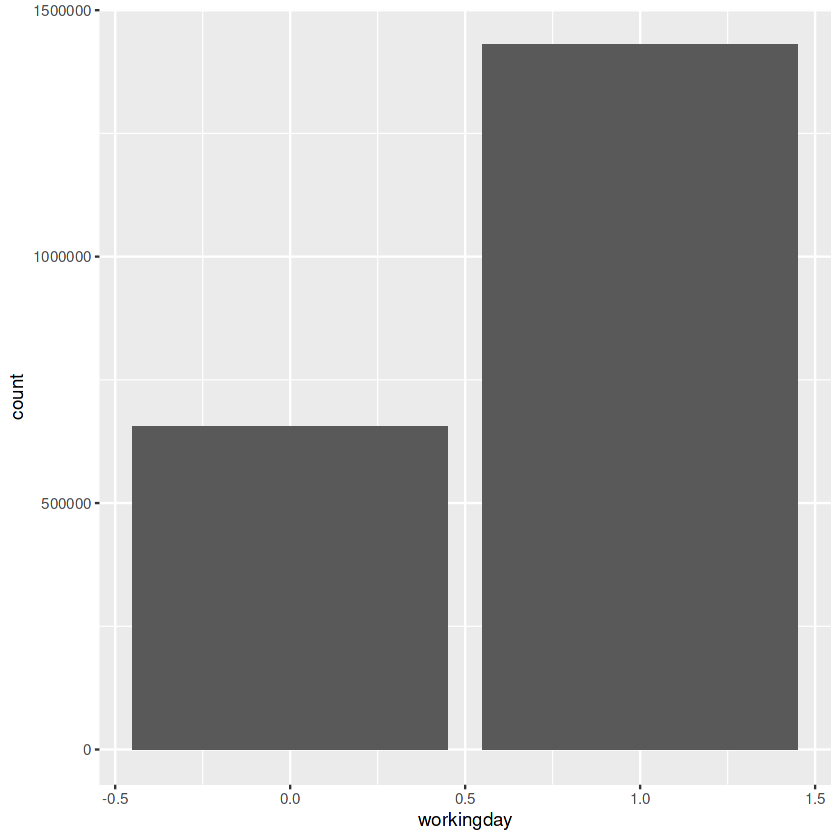

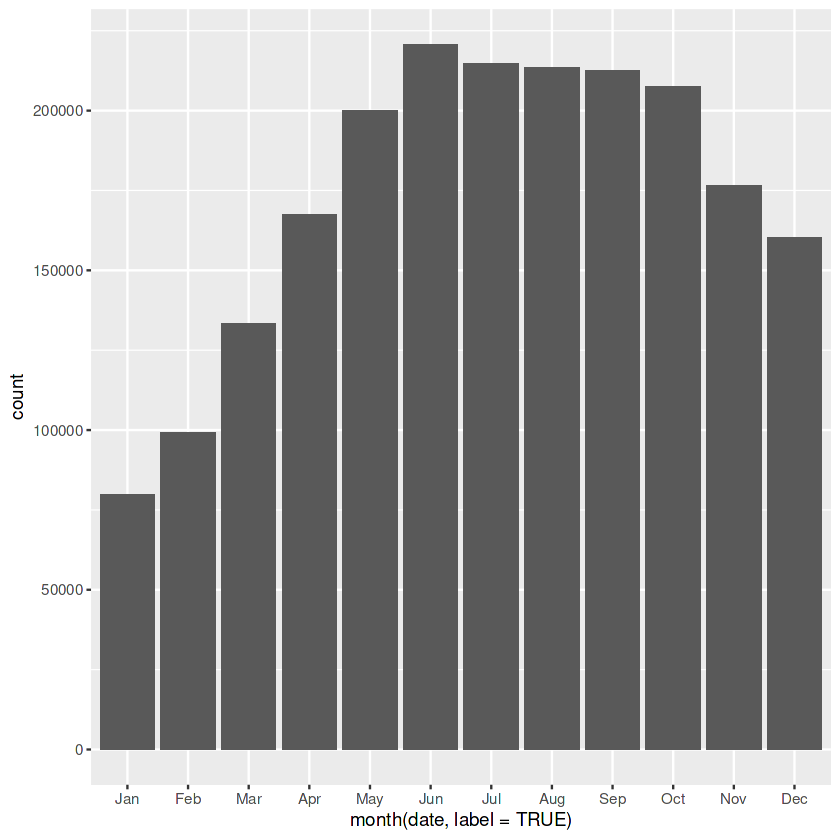

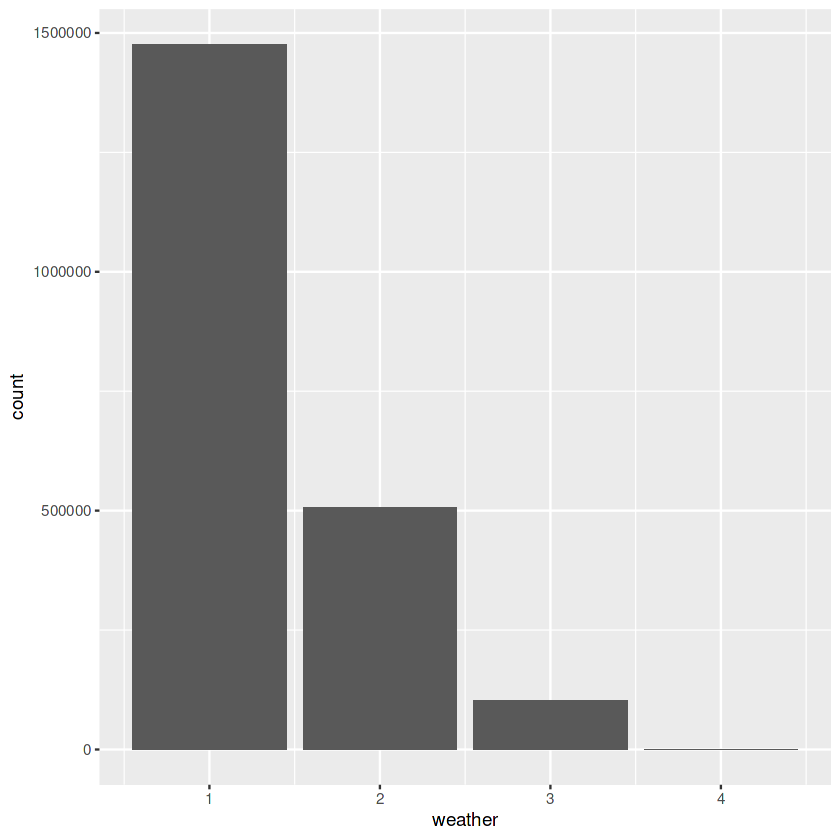

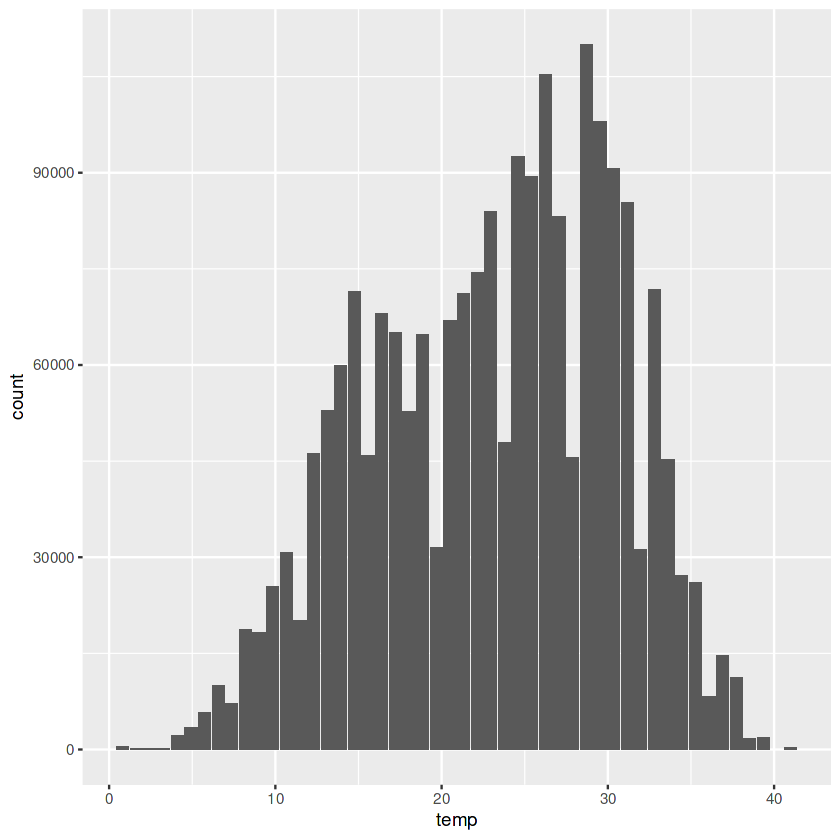

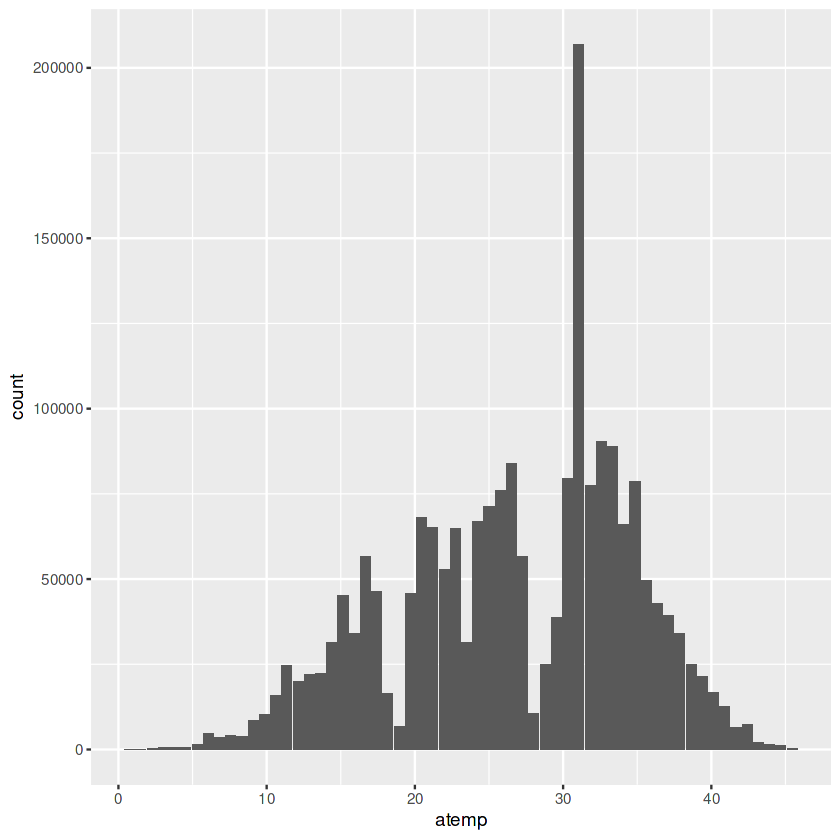

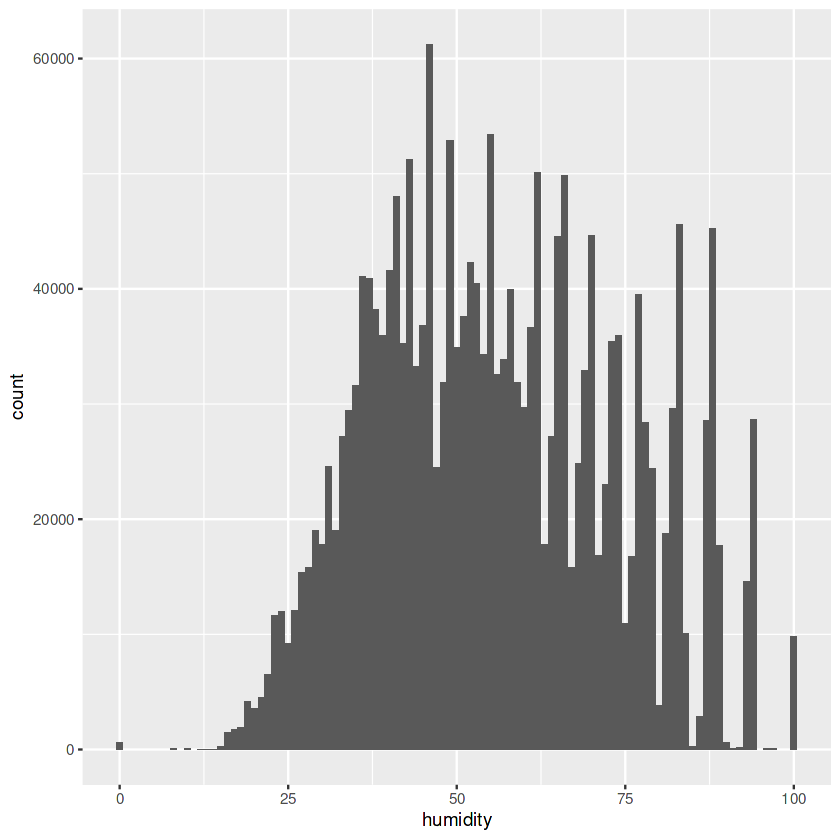

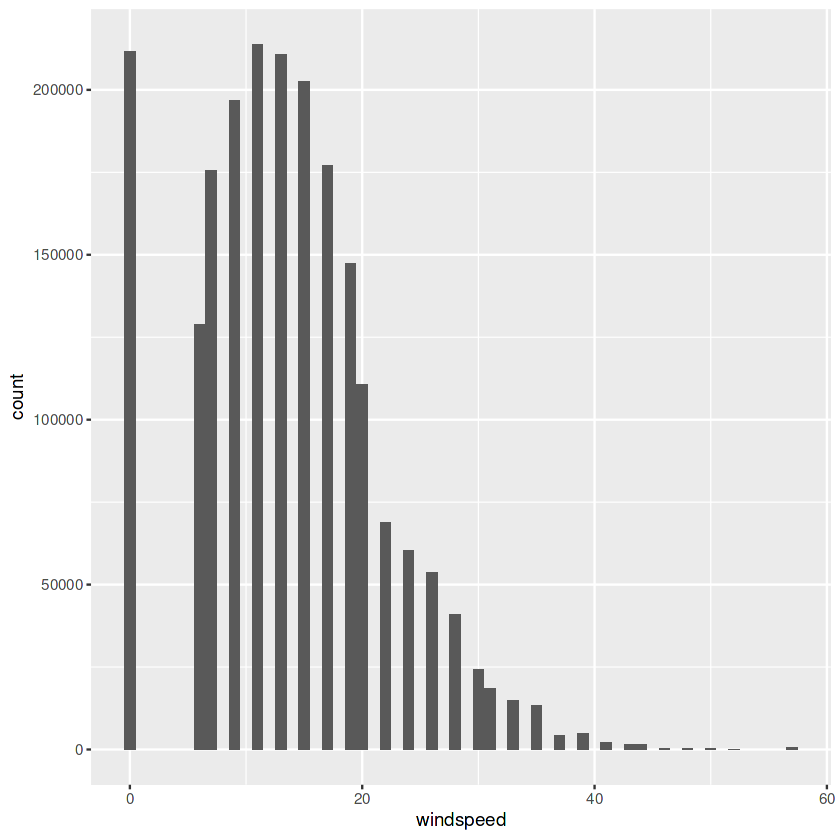

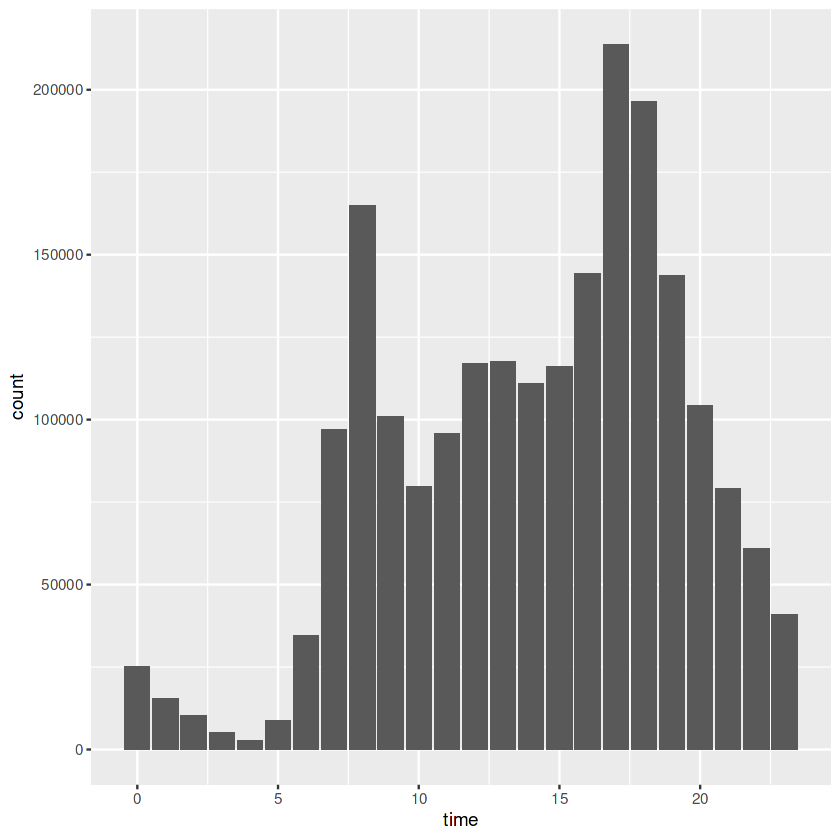

In [10]:
# Plot chart to see relation.
ggplot(yulu_new_df , aes(x = season , y = count )) +
    geom_col()
ggplot(yulu_new_df , aes(x = holiday , y = count )) +
    geom_col()
ggplot(yulu_new_df , aes(x = workingday , y = count )) +
    geom_col()
ggplot(yulu_new_df , aes(x = month(date,label = TRUE) , y = count)) +
    geom_col()
ggplot(yulu_new_df , aes(x = weather , y = count )) +
    geom_col()
ggplot(yulu_new_df , aes(x = temp , y = count )) +
    geom_col()
ggplot(yulu_new_df , aes(x = atemp , y = count)) +
    geom_col()
ggplot(yulu_new_df , aes(x = humidity , y = count )) +
    geom_col()
ggplot(yulu_new_df , aes(x = windspeed , y = count )) +
    geom_col()
ggplot(yulu_new_df , aes(x = time , y = count )) +
    geom_col()

### Here are I found

Correlation of 0.3 or higher is often considered moderately strong. So `temp`, `atemp` ,`humidity` and `time` parameter are moderately correlation to electric cycles depends.


In [11]:
# Finding the most electric cycle demands by temp
query_temp <- "SELECT 
            temp,
            sum(count) as total_count
          FROM yulu_new_df
            Group by temp
            Order by total_count desc
            limit 5"
sqldf(query_temp)

temp,total_count
<dbl>,<int>
28.70,110029
26.24,105279
29.52,98025
24.60,92501
30.34,90655


### Temperatuer

#### The top 3 temperature has highest electric cycle demands are 28.70, 26.24 and 29.52 celsius. 

In [12]:
# Finding the most electric cycle demands by atemp
query_atemp <- "SELECT 
            atemp,
            sum(count) as total_count
          FROM yulu_new_df
            Group by atemp
            Order by total_count desc
            limit 5"
sqldf(query_atemp)

atemp,total_count
<dbl>,<int>
31.060,206885
32.575,90235
33.335,88855
26.515,83895
30.305,79552


### Feeling temperature

#### The top 3 feeling temperature has highest electric cycle demands are 31.06 , 32.57 and 33.33 celsius. 

In [13]:
# Finding the most electric cycle demands by humidity
query_humidity <- "SELECT 
            humidity,
            sum(count) as total_count
          FROM yulu_new_df
            Group by humidity
            Order by total_count desc
            limit 5"
sqldf(query_humidity)

humidity,total_count
<int>,<int>
46,61231
55,53409
49,52893
43,51267
62,50103


### Humidity

#### The top 3 humidity has highest electric cycle demands are 46, 55 and 49. 

In [14]:
# Finding the most electric cycle demands by time
query_time <- "SELECT 
            time,
            sum(count) as total_count
          FROM yulu_new_df
            Group by time
            Order by total_count desc
            limit 5"
sqldf(query_time)

time,total_count
<int>,<int>
17,213757
18,196472
8,165060
16,144266
19,143767


### Time

#### The most electric cycle demands are in evening (16PM-19PM). However morning also peak  demands on 8AM.

### Moreover

Season : Most demand in Rainy. Less demand in String.

Working day : Most demand in working day.

Month : Most demand in June, July, August and September.

Weather: Most demand in Clear, Few clouds, partly cloudy, partly cloudy weather.

Wind speed : Most demand are in wind speed less than 20.

# Hypothesis testing

### Has Working Day effect on number of electric cycles rented?

#### 1. Define hypothesis

H0: There is no significant difference in the number of electric cycles rented on working days and non-working days.

Ha: There is a significant difference in the number of electric cycles rented on working days and non-working days.

#### 2. Prepare data

In [15]:
# Set workday and no workday data
workday <- filter(yulu_new_df , workingday==1)
coun_workday <- workday$count

noworkday <- filter(yulu_new_df , workingday==0)
coun_noworkday <- noworkday$count

#### 3. Statistical test

In [16]:
# F-Test for variance 
var.test(coun_workday, coun_noworkday)


	F test to compare two variances

data:  coun_workday and coun_noworkday
F = 1.1281, num df = 7411, denom df = 3473, p-value = 3.97e-05
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.065247 1.193893
sample estimates:
ratio of variances 
          1.128073 


F-Test for variance of working day and no working day data is 0.0000397. It is less than 0.05. So there is a **significant difference** between the variances of the two groups being compared.

In [17]:
# Perform Welch's t-test
t.test(coun_workday, coun_noworkday, var.equal = FALSE)


	Welch Two Sample t-test

data:  coun_workday and coun_noworkday
t = 1.2363, df = 7176.3, p-value = 0.2164
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.638581 11.649085
sample estimates:
mean of x mean of y 
 193.0119  188.5066 


### 4. Conclusion

The p-value is 0.2164. Since the p-value is greater than 0.05, we fail to reject the null hypothesis that the means of the two groups are equal. We can conclude that the means of electric cycles rented on working day and no working day are **not significant difference**.

### No. of cycles rented similar or different in different seasons?

**Define hypothesis**

H0: There is no significant difference in the number of electric cycles rented on different seasons.

Ha: There is a significant difference in the number of electric cycles rented on different seasons.

In [18]:
# Perform a one-way ANOVA test
result <- aov(count ~ season, data = yulu_new_df)
summary(result)


               Df    Sum Sq Mean Sq F value Pr(>F)    
season          1   9540914 9540914   298.7 <2e-16 ***
Residuals   10884 347631999   31940                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In this output, the one-way ANOVA test shows that there is a significant difference in the mean number of cycles rented in different seasons (p < 0.001), as indicated by the very low p-value (< 2e-16). Therefore, we can conclude that the number of cycles rented **is different across seasons**.

### No. of cycles rented similar or different in different weather?

**Define hypothesis**

H0: There is no significant difference in the number of electric cycles rented on different weather.

Ha: There is a significant difference in the number of electric cycles rented on different weather.

In [19]:
# Perform a one-way ANOVA test
result <- aov(count ~ weather, data = yulu_new_df)
summary(result)

               Df    Sum Sq Mean Sq F value Pr(>F)    
weather         1   5911983 5911983   183.2 <2e-16 ***
Residuals   10884 351260930   32273                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In this output, the one-way ANOVA test shows that there is a significant difference in the mean number of cycles rented in different seasons (p < 0.001), as indicated by the very low p-value (< 2e-16). Therefore, we can conclude that the number of cycles rented **is different across weather**.

### Weather is dependent on season (check between 2 predictor variable)

#### Set hypothesis 

Null Hypothesis (H0): Weather is independent of season. There is no association between the two variables.

Alternative Hypothesis (HA): Weather is dependent on season. There is an association between the two variables.

In [20]:
# I use Chi-Squared for Test
wea_sea <- data.frame(yulu_new_df$season, yulu_new_df$weather)
chisq.test(wea_sea)

Warning message in chisq.test(wea_sea):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  wea_sea
X-squared = 3787.7, df = 10885, p-value = 1


The chi-squared test of independence is 1, we would fail to reject the null hypothesis. We would conclude that there is **no significant relationship** between season and weather.

# Conclusion

Here is my conclusion.

* Most relative parameter to cycle demand are `time` , `temp` , `feeling temp` and `humunity`.
* Most demand in evening time (16PM-19PM).
* Most temperature cycle demand are 28.70, 26.24 and 29.52 celsius.
* Most feeling temperature cycle demand are 31.06 , 32.57 and 33.33 celsius.
* Most humidity cycle demand are 46, 55 and 49.

And
* The number of cycles rented is significant different across seasons by highest rented in Rainy season.
* The number of cycles rented is significant different across weather by highest rented in Clear, Few clouds, partly cloudy, partly cloudy weather.

However
* The means of electric cycles rented on working day and no working day are not significant difference.
* There is no significant relationship between season and weather.